# K-Means Clustering

In [93]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
X,Y = make_blobs?

In [94]:
X,Y = make_blobs(n_samples=500,centers=5,random_state=3)

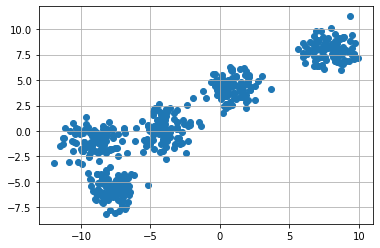

In [9]:
plt.figure(0)
plt.grid(True)
plt.scatter(X[:,0],X[:,1])
plt.show()

In [83]:
k =5

color = ["green","red","blue","yellow","orange"]
clusters = {}

for i in range(k):
    center = 10*(2*np.random.random((X.shape[1],))-1)
    points = []
    
    cluster = {
        'center':center,
        'points':points,
        'color':color[i]
    }
    
    clusters[i] = cluster
    
print(clusters)

{0: {'center': array([-4.43991439,  7.43306979]), 'points': [], 'color': 'green'}, 1: {'center': array([ 5.49508622, -1.00852678]), 'points': [], 'color': 'red'}, 2: {'center': array([ 9.27052469, -8.70478607]), 'points': [], 'color': 'blue'}, 3: {'center': array([ 4.04374342, -1.18919314]), 'points': [], 'color': 'yellow'}, 4: {'center': array([-0.72653146,  5.86378882]), 'points': [], 'color': 'orange'}}


In [76]:
def distance(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))

In [77]:
def assignPointToClusters(clusters):
    for ix in range(X.shape[0]):
        dist = []
        curr_x = X[ix]

        for kx in range(k):
            d = distance(curr_x,clusters[kx]['center'])
            dist.append(d)

        current_cluster = np.argmin(dist)
        clusters[current_cluster]['points'].append(curr_x)
        
def updateClusters(clusters):
    for kx in range(k):
        pts = np.array(clusters[kx]['points'])
        
        if pts.shape[0]>0:
            new_u = pts.mean(axis=0)
            clusters[kx]['center'] = new_u
            clusters[kx]['points'] = []

def plotClusters(clusters):
    
    for kx in range(k):
        
        #print(len(clusters[kx]['points']))
        
        pts = np.array(clusters[kx]['points'])
        #print(pts.shape)
        
        try:
            plt.scatter(pts[:,0],pts[:,1], color = clusters[kx]['color'])
        except:
            pass
        
        uk = clusters[kx]['center']
        plt.scatter(uk[0],uk[1],color="black",marker="*")
    

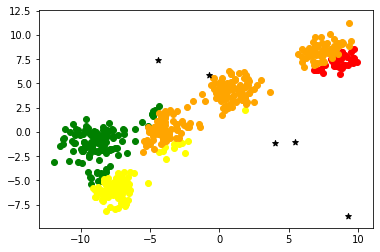

In [84]:
assignPointToClusters(clusters)
plotClusters(clusters)

In [85]:
updateClusters(clusters)

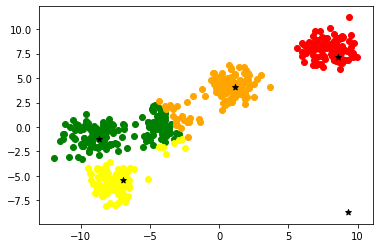

In [86]:
assignPointToClusters(clusters)
plotClusters(clusters)

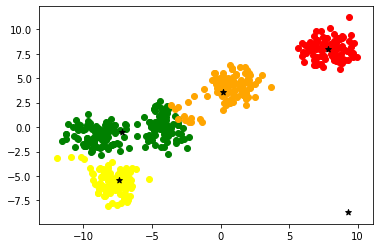

In [87]:
updateClusters(clusters)
assignPointToClusters(clusters)
plotClusters(clusters)

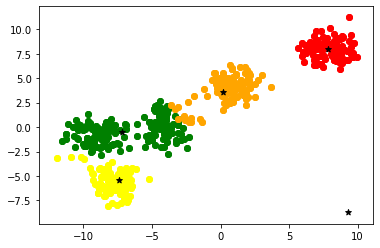

In [88]:
assignPointToClusters(clusters)
plotClusters(clusters)

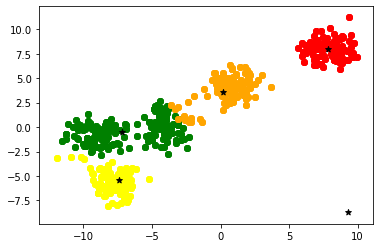

In [89]:
assignPointToClusters(clusters)
plotClusters(clusters)

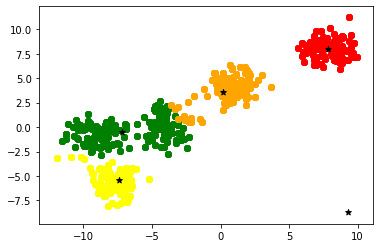

In [90]:
assignPointToClusters(clusters)
plotClusters(clusters)

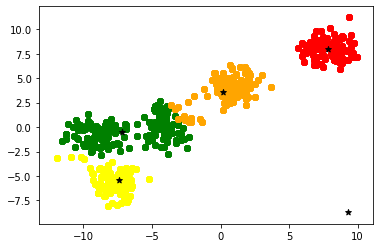

In [91]:
assignPointToClusters(clusters)
plotClusters(clusters)

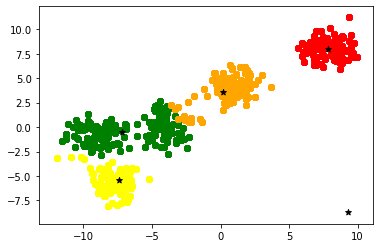

In [92]:
assignPointToClusters(clusters)
plotClusters(clusters)

# KMeans++

In [95]:
from sklearn.cluster import KMeans

In [97]:
kmeans = KMeans(n_clusters=5)

kmeans.fit(X,Y)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [101]:
centers = kmeans.cluster_centers_

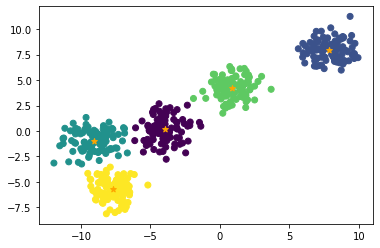

In [106]:
plt.scatter(X[:,0],X[:,1],c=pred)
plt.scatter(centers[:,0],centers[:,1],marker='*',color='orange')

In [105]:
pred = kmeans.labels_
pred

array([4, 1, 0, 4, 4, 0, 2, 4, 1, 4, 1, 0, 1, 4, 0, 4, 1, 4, 4, 1, 3, 3,
       4, 0, 4, 3, 2, 2, 0, 2, 4, 2, 3, 3, 4, 3, 1, 1, 4, 3, 3, 3, 2, 2,
       0, 1, 1, 2, 2, 2, 1, 4, 2, 4, 4, 3, 4, 4, 1, 0, 1, 0, 0, 4, 2, 1,
       0, 0, 3, 0, 3, 4, 3, 4, 3, 0, 4, 2, 3, 3, 0, 3, 0, 2, 1, 2, 0, 1,
       2, 0, 2, 3, 4, 3, 3, 1, 4, 0, 0, 3, 1, 3, 0, 0, 1, 1, 1, 0, 0, 4,
       1, 2, 4, 1, 0, 3, 1, 2, 3, 0, 1, 0, 2, 4, 3, 2, 2, 2, 4, 4, 0, 0,
       4, 1, 1, 2, 0, 2, 0, 4, 4, 3, 0, 1, 2, 4, 1, 1, 4, 0, 4, 4, 0, 0,
       1, 3, 3, 2, 0, 4, 3, 1, 2, 3, 1, 3, 1, 3, 3, 3, 2, 4, 3, 1, 3, 2,
       4, 0, 1, 2, 1, 4, 1, 3, 2, 2, 3, 4, 0, 1, 3, 0, 2, 4, 2, 3, 0, 2,
       4, 4, 4, 3, 3, 1, 4, 2, 2, 4, 1, 4, 4, 4, 3, 1, 0, 1, 4, 4, 1, 2,
       0, 2, 2, 3, 4, 0, 4, 0, 2, 3, 0, 0, 4, 3, 4, 3, 0, 1, 0, 3, 3, 1,
       4, 4, 0, 0, 3, 1, 3, 4, 2, 1, 2, 4, 2, 2, 2, 2, 1, 3, 1, 4, 3, 1,
       2, 0, 1, 1, 1, 2, 4, 4, 0, 3, 3, 1, 0, 0, 4, 0, 2, 0, 1, 1, 2, 2,
       3, 2, 2, 1, 3, 4, 0, 3, 0, 2, 0, 0, 1, 4, 3,

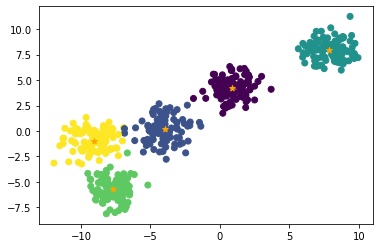

In [107]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.scatter(centers[:,0],centers[:,1],marker='*',color='orange')

# DBSCAN

In [116]:
# KMeans fails here 

In [108]:
from sklearn.datasets import make_circles,make_moons

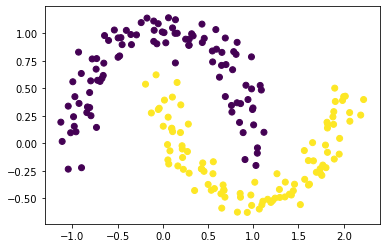

In [115]:
X,Y = make_moons(n_samples=200, noise=0.10)
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [112]:
km = KMeans(n_clusters=2)
km.fit(X,Y)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

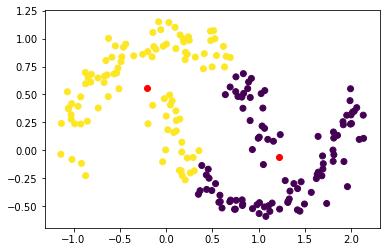

In [114]:
centers = km.cluster_centers_
label = km.labels_

plt.scatter(X[:,0],X[:,1],c=label)
plt.scatter(centers[:,0],centers[:,1],color='red')
plt.show()

In [117]:
# DBSCAN

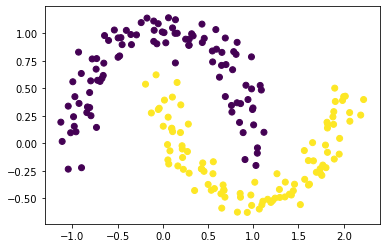

In [118]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [133]:
from sklearn.cluster import DBSCAN

dbs = DBSCAN?

dbs = DBSCAN(eps=0.2,min_samples=5)
dbs.fit(X)

DBSCAN(algorithm='auto', eps=0.2, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [131]:
Ypred = dbs.fit_predict(X)

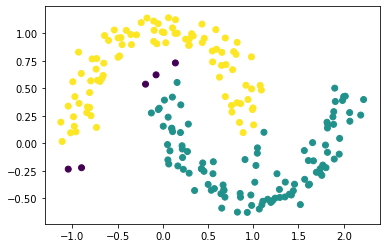

In [132]:
plt.scatter(X[:,0],X[:,1],c=Ypred)
plt.show()